In [1]:
%matplotlib ipympl

import matplotlib.pyplot as plt
import numpy as np

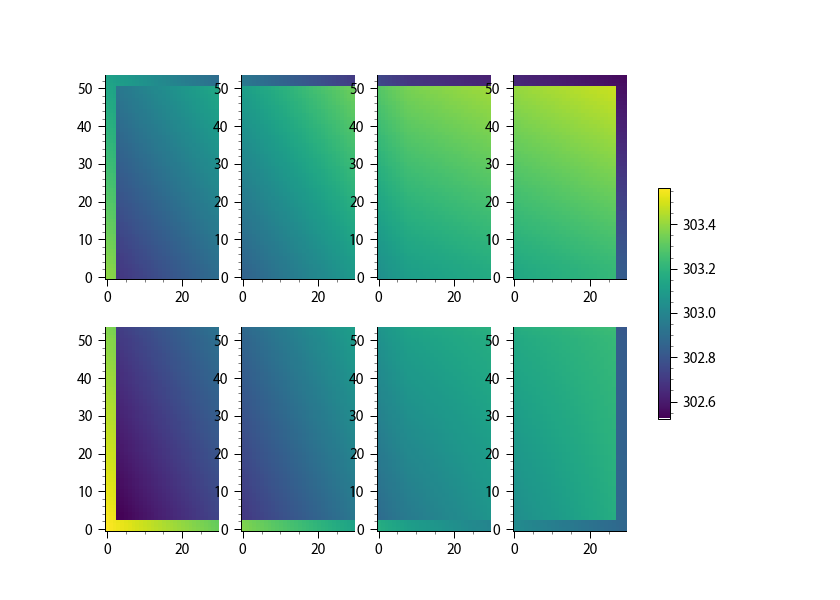

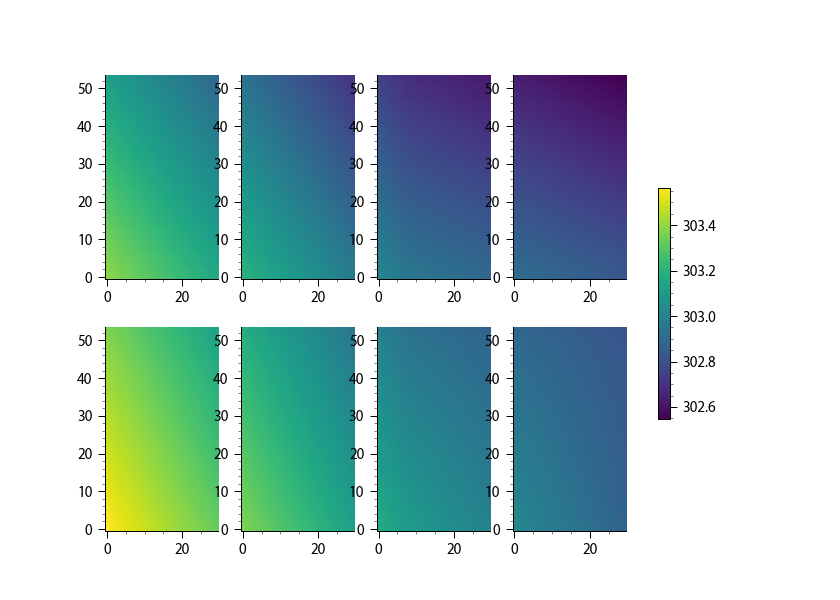

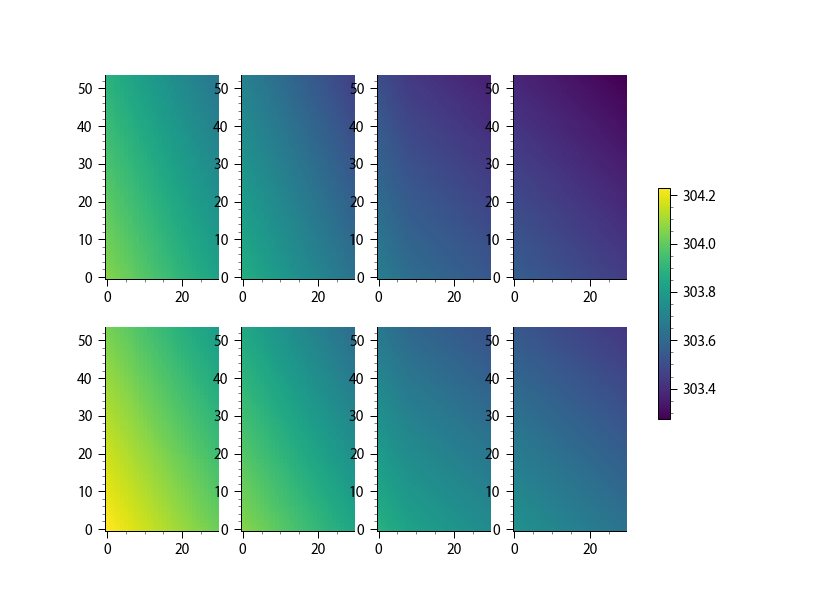

In [16]:
npx = 4
npy = 2

itot = 96
jtot = 96
ktot = 96

igc = 3
jgc = 3
kgc = 2

imax = int(itot / npx)
jmax = int(jtot / npy)

icells = imax + 2 * igc
jcells = jmax + 2 * jgc
kcells = ktot + 2 * kgc

def read_bin(fld, i, j):
    fld = np.fromfile(f'{fld}.{i}.{j}.bin')
    fld = fld.reshape((kcells, jcells, icells))
    return fld

for k in [1,2,10]:

    fig = plt.figure()
    
    vmin = 1e9
    vmax = -1e9
    for j in range(npy-1, -1, -1):
        for i in range(npx):
            thl = read_bin('outer/thl', i, j)
            vmin = min(vmin, thl[k].min())
            vmax = max(vmax, thl[k].max())
    
    for j in range(npy-1, -1, -1):
        for i in range(npx):
            thl = read_bin('outer/thl', i, j)
            subplot_idx = (npy - 1 - j) * npx + i + 1
            plt.subplot(npy, npx, subplot_idx)
            im = plt.imshow(thl[k,:,:], origin='lower', vmin=vmin, vmax=vmax)
    
    fig.colorbar(im, shrink=0.5, ax=fig.get_axes())